# **[1]**
Use sns.load_dataset('iris') dataset to classify iris flowers 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset 
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# how many example of each class has
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [5]:
iris.shape

(150, 5)

In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


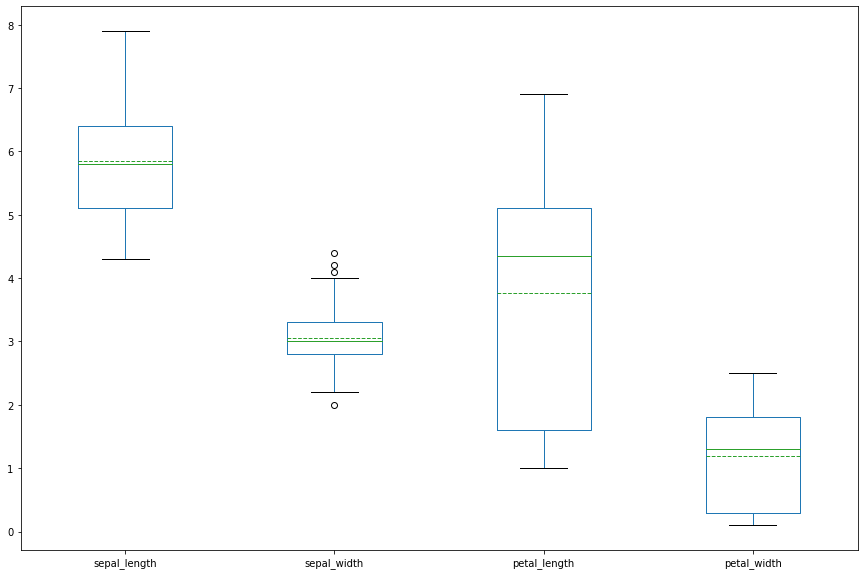

In [10]:
# univariate analysis
iris.plot(kind = 'box', figsize = (15,10), showmeans = True, meanline = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A19DC83A0>,
      dtype=object)

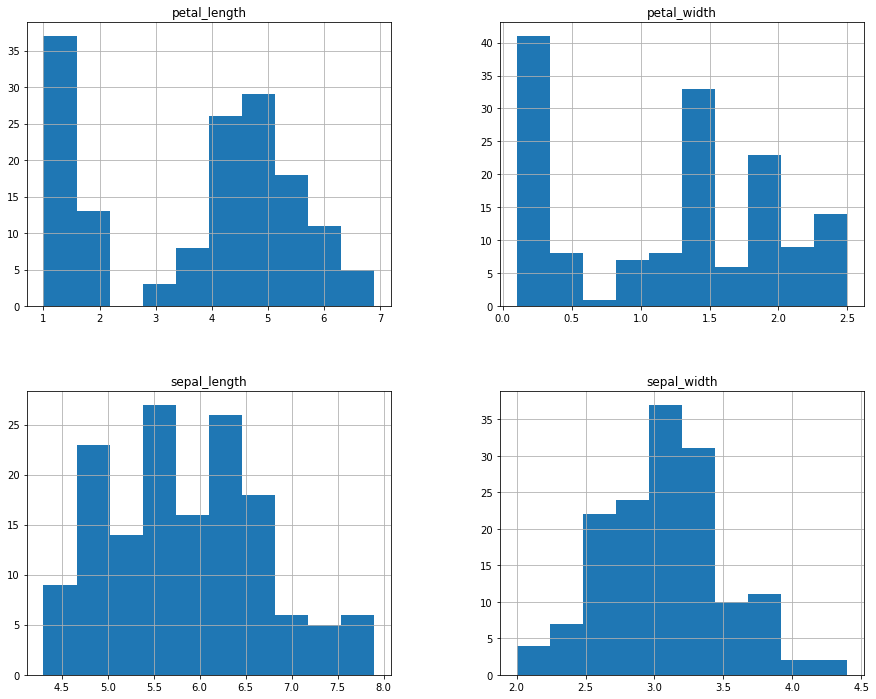

In [11]:
iris.hist( figsize = (15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A19F82AC0>,
      dtype=object)

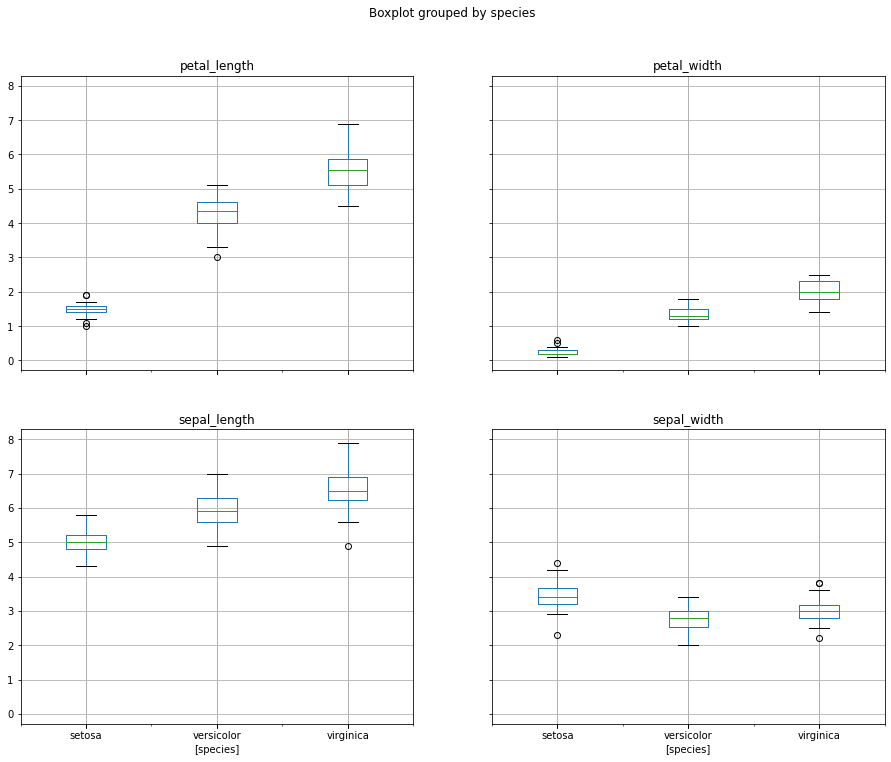

In [12]:
# box plot grouped by species 
iris.boxplot(by = 'species', figsize = (15,12))

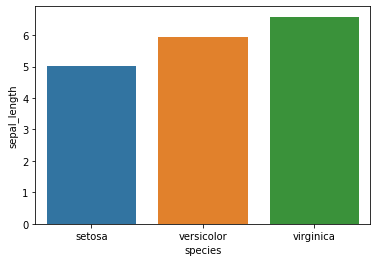

In [13]:
# bivariate analysis
sns.barplot(x= 'species', y= 'sepal_length', data = iris, ci = False)

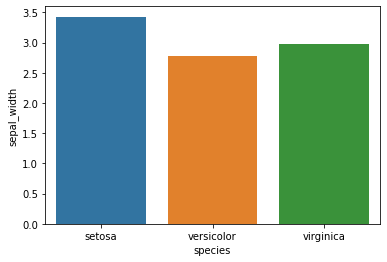

In [14]:
sns.barplot(x= 'species', y= 'sepal_width', data = iris, ci = False)

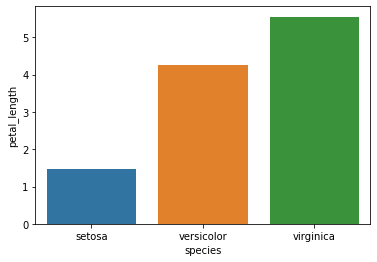

In [15]:
sns.barplot(x= 'species', y= 'petal_length', data = iris, ci = False)

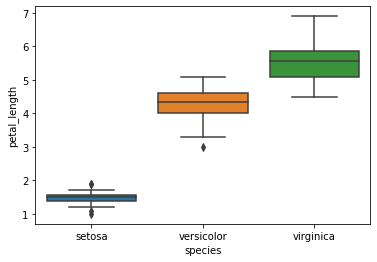

In [16]:
sns.boxplot(x= 'species', y= 'petal_length', data = iris)

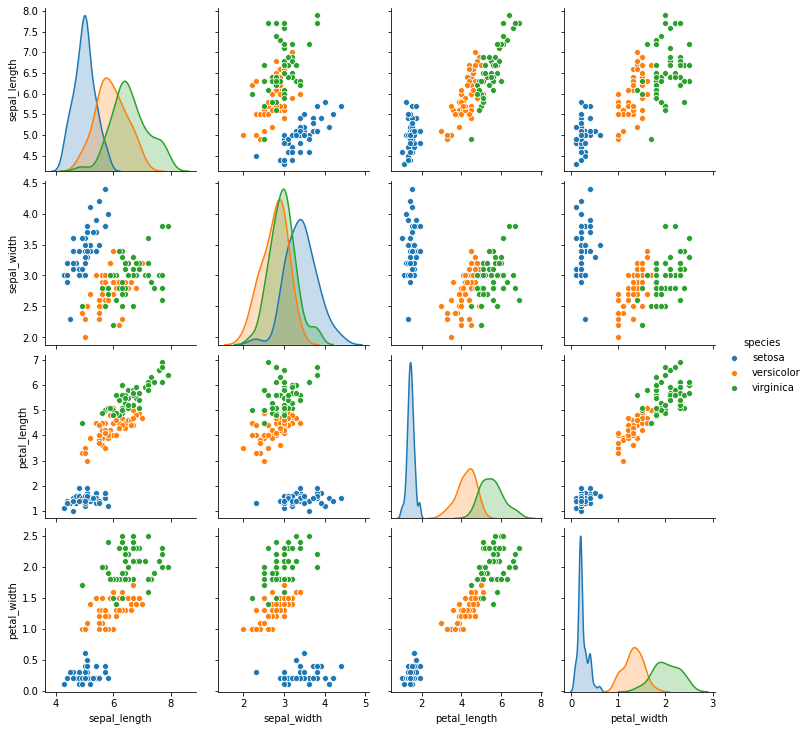

In [17]:
sns.pairplot(iris, hue = 'species')

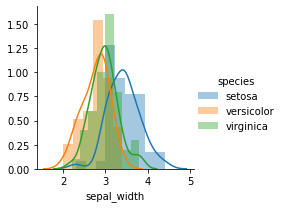

In [18]:
sns.FacetGrid(data = iris,hue = 'species', size = 3).map(sns.distplot, 'sepal_width').add_legend()

In [19]:
#one Hot encoding
iris['species'] = pd.get_dummies(iris['species'])
iris['species']

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 150, dtype: uint8

In [20]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.717416
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.603348
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.922765
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.887344
species,-0.717416,0.603348,-0.922765,-0.887344,1.000000


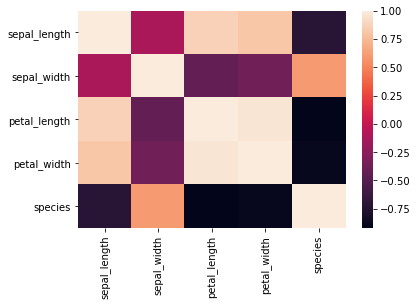

In [21]:
sns.heatmap(iris.corr())

In [22]:
# Adding some extra feature
iris['sl_sw'] = iris['sepal_length'] * iris['sepal_width']
iris['sl_pw'] = iris['sepal_length'] * iris['petal_width']
iris['sl_pl'] = iris['sepal_length'] * iris['petal_length']
iris['sw_pl'] = iris['sepal_width'] * iris['petal_length']
iris['sw_pw'] = iris['sepal_width'] * iris['petal_width']
iris['pl_pw'] = iris['petal_length'] * iris['petal_width']

In [23]:
cmat = iris.corr('pearson')
cmat

,sepal_length,sepal_width,petal_length,petal_width,species,sl_sw,sl_pw,sl_pl,sw_pl,sw_pw,pl_pw
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.717416,0.679180,0.884524,0.934408,0.901226,0.831181,0.857300
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.603348,0.643461,-0.297429,-0.334113,-0.187337,-0.200197,-0.288431
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.922765,0.360909,0.963512,0.983126,0.961167,0.929336,0.958422
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.887344,0.368845,0.986294,0.937270,0.942824,0.979485,0.980333
species,-0.717416,0.603348,-0.922765,-0.887344,1.000000,-0.119250,-0.844209,-0.857957,-0.831547,-0.819461,-0.817285
sl_sw,0.679180,0.643461,0.360909,0.368845,-0.119250,1.000000,0.468962,0.476689,0.569183,0.507975,0.454503
sl_pw,0.884524,-0.297429,0.963512,0.986294,-0.844209,0.468962,1.000000,0.967457,0.964125,0.980456,0.992889
sl_pl,0.934408,-0.334113,0.983126,0.937270,-0.857957,0.476689,0.967457,1.000000,0.970364,0.922001,0.960122
sw_pl,0.901226,-0.187337,0.961167,0.942824,-0.831547,0.569183,0.964125,0.970364,1.000000,0.964796,0.960028
sw_pw,0.831181,-0.200197,0.929336,0.979485,-0.819461,0.507975,0.980456,0.922001,0.964796,1.000000,0.974738


In [24]:
# taking those variable which has high correlation(thres - 0.8)
X = iris.drop(columns= ['sepal_length', 'sepal_width', 'sl_sw', 'species'])
y = iris.species

In [25]:
print(y.head(146))
X.head()


0      1
1      1
2      1
3      1
4      1
      ..
141    0
142    0
143    0
144    0
145    0
Name: species, Length: 146, dtype: uint8


,petal_length,petal_width,sl_pw,sl_pl,sw_pl,sw_pw,pl_pw
0,1.4,0.2,1.02,7.14,4.90,0.70,0.28
1,1.4,0.2,0.98,6.86,4.20,0.60,0.28
2,1.3,0.2,0.94,6.11,4.16,0.64,0.26
3,1.5,0.2,0.92,6.90,4.65,0.62,0.30
4,1.4,0.2,1.00,7.00,5.04,0.72,0.28


In [26]:
X.shape, y.shape

((150, 7), (150,))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
model.score(X_train, y_train)

1.0

In [31]:
predection = model.predict(X_test)
predective = pd.DataFrame({'Actual' : y_test, 'Predection' : predection})
print(predective)
accuracy_score(y_test, predection)

     Actual  Predection
14        1           1
98        0           0
75        0           0
16        1           1
131       0           0
56        0           0
141       0           0
44        1           1
29        1           1
120       0           0
94        0           0
5         1           1
102       0           0
51        0           0
78        0           0
42        1           1
92        0           0
66        0           0
31        1           1
35        1           1
90        0           0
84        0           0
77        0           0
40        1           1
125       0           0
99        0           0
33        1           1
19        1           1
73        0           0
146       0           0
91        0           0
135       0           0
69        0           0
128       0           0
114       0           0
48        1           1
53        0           0
28        1           1
54        0           0
108       0           0
112       0     

1.0

In [32]:
recall_score(y_test, predection)

1.0

In [33]:
precision_score(y_test, predection)

1.0

In [34]:
confusion_matrix(y_test, predection)

array([[31,  0],
       [ 0, 14]], dtype=int64)

In [35]:
classification_report(y_test, predection)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        31\n           1       1.00      1.00      1.00        14\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

In [36]:
pd.to_pickle(model, 'IRIS_Model.bin')